In [65]:
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow
import imutils
import os
import matplotlib.pyplot as plt

In [86]:
I1 = cv2.imread("trybik.jpg", flags=cv2.IMREAD_COLOR)

I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)

ret, I1_bin = cv2.threshold(I1_gray,127,255,cv2.THRESH_BINARY)

I1_bin_neg = cv2.bitwise_not(I1_bin)

# close 
I1_closed = cv2.morphologyEx(I1_bin_neg, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))


Text(0.5, 1.0, 'Negative Binary Image')

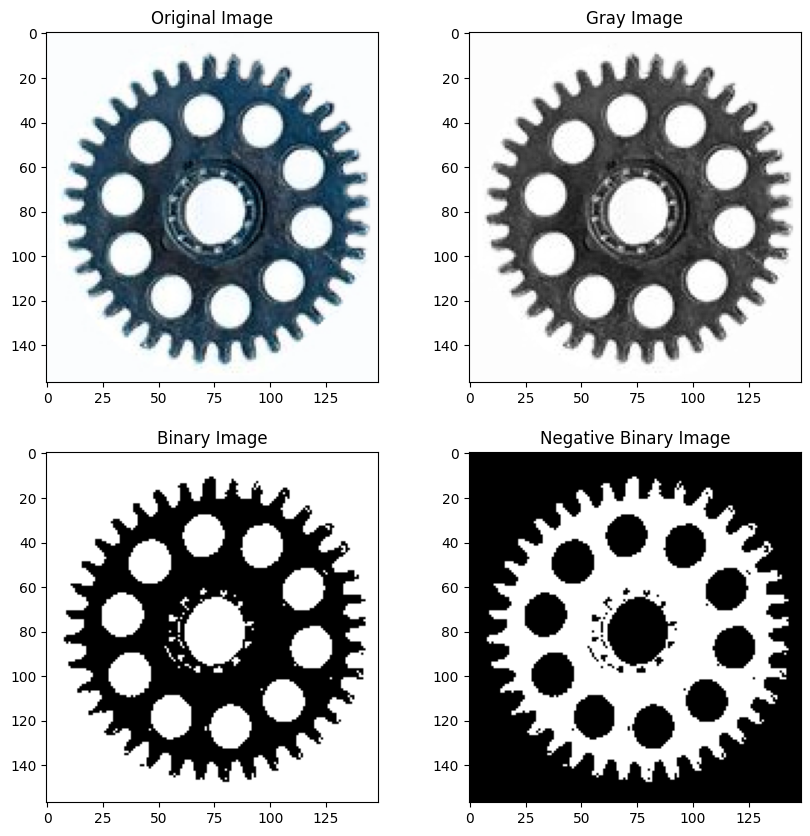

In [72]:
#display the results 

plt.subplots(2,2, figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(I1, cmap='rainbow')
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(I1_gray, cmap='gray')
plt.title('Gray Image')

plt.subplot(2,2,3)
plt.imshow(I1_bin, cmap='gray')
plt.title('Binary Image')

plt.subplot(2,2,4)
plt.imshow(I1_bin_neg, cmap='gray')
plt.title('Negative Binary Image')

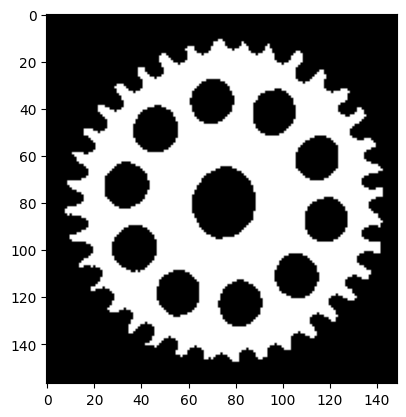

In [87]:
plt.imshow(I1_closed, cmap = "gray")

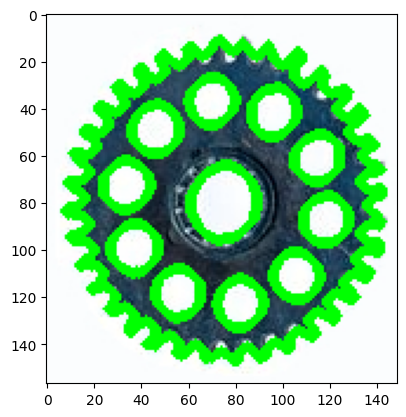

In [88]:
contours, hierarchy = cv2.findContours(I1_closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(I1, contours, -1, (0, 255, 0), 3)

plt.imshow(I1, cmap = "gray")

9507.0 755213.0 730066.0


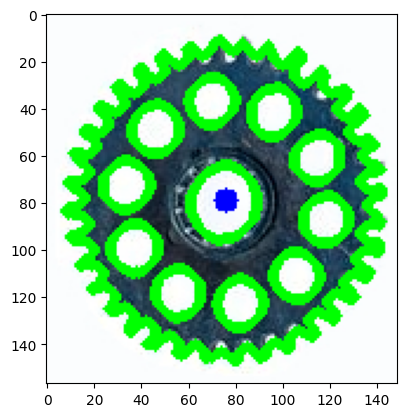

In [80]:
sobelx = cv2.Sobel(I1_gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(I1_gray, cv2.CV_64F, 0, 1, ksize=5)

moments = cv2.moments(I1_closed, 1)

m00, m01, m10 = moments['m00'], moments['m01'], moments['m10']

print(m00, m01, m10)

middle_point = (int(m10/m00), int(m01/m00))

# cv2.circle(I1, middle_point, 5, (0, 0, 255), -1)
# plt.imshow(I1, cmap = "gray")

In [81]:
Rtable = [[] for _ in range(360)]

# fill R-table with vectors connecting the middle point with the contour points
# write the distance and the angle with OX (np.arctan2(dy, dx))
# write the data in the index where the angle is rounded to the nearest integer

for contour in contours:
    for point in contour:
        point = point[0]
        dx = point[0] - middle_point[0]
        dy = point[1] - middle_point[1]
        angle = np.arctan2(dy, dx)
        distance = np.sqrt(dx**2 + dy**2)
        Rtable[int(np.round(np.degrees(angle))%360)].append((distance, angle))

# sort the vectors in each cell of the R-table by distance

for cell in Rtable:
    cell.sort()

# create the accumulator array

acc = np.zeros((I1.shape[0], I1.shape[1]))

# for each pixel in the image

for i in range(I1.shape[0]):
    for j in range(I1.shape[1]):
        if I1_closed[i, j] == 255:
            for angle in range(360):
                for distance in range(1, 50):
                    new_i = i + int(distance * np.sin(np.radians(angle)))
                    new_j = j + int(distance * np.cos(np.radians(angle)))
                    if new_i >= 0 and new_i < I1.shape[0] and new_j >= 0 and new_j < I1.shape[1]:
                        acc[new_i, new_j] += 1

# display the results

plt.imshow(acc, cmap = "gray")

# find the maximum value in the accumulator array



KeyboardInterrupt: 